# Global Temperature Trends Analysis

This notebook analyzes global temperature data for multiple countries to visualise climate change trends.

Student Name: Mathujan Sivananthan

Student ID: 24087340

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from datetime import datetime

# Set style for plots
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## Setup 

In [2]:
# Representative countries from different regions
countries = ['united-states', 'china', 'india', 'germany', 'brazil', 'australia']

# Define a distinct color palette for better readability
country_colors = {
    'united-states': '#1f77b4',  # blue
    'china': '#d62728',          # red
    'india': '#ff7f0e',          # orange
    'germany': '#2ca02c',        # green
    'brazil': '#9467bd',         # purple
    'australia': '#8c564b'       # brown
}

## Load and Process Data

In [3]:
# Dictionary to store dataframes
dfs = {}

# Load the global temperature data file
global_temperature_df = pd.read_csv('global_temperature_data.csv')
print("Loaded global temperature data file")

# Process data for each country
for country in countries:
    # Convert country format to match the format in the global temperature CSV
    country_formatted = country.replace('-', ' ').title()
    
    # Filter the global temperature data for this country
    country_data = global_temperature_df[global_temperature_df['country'] == country_formatted]
    
    if not country_data.empty:
        # Select only the columns that match the original data structure
        df = country_data[['year', 'month', 'year_decimal', 'temperature_C', 'uncertainty_C']].copy()
        dfs[country] = df
        print(f"Processed data for {country}: {len(df)} records from {df['year'].min()} to {df['year'].max()}")
    else:
        print(f"No data found for {country}")

Loaded global temperature data file
Processed data for united-states: 2514 records from 1768 to 2016
Processed data for china: 2137 records from 1841 to 2020
Processed data for india: 2105 records from 1816 to 2020
Processed data for germany: 3251 records from 1750 to 2020
Processed data for brazil: 1626 records from 1857 to 2020
Processed data for australia: 1739 records from 1876 to 2020


In [4]:
dfs

{'united-states':       year  month  year_decimal  temperature_C  uncertainty_C
 0     1768      9      1768.708          7.604          2.432
 1     1768     10      1768.792          6.972          2.829
 2     1768     11      1768.875          7.200          3.599
 3     1768     12      1768.958          7.812          4.940
 4     1769      1      1769.042          8.640          5.222
 ...    ...    ...           ...            ...            ...
 2509  2016      1      2016.042         11.389          0.277
 2510  2016      2      2016.125         12.537          0.190
 2511  2016      3      2016.208         12.531          0.131
 2512  2016      4      2016.292         10.679          0.156
 2513  2016      5      2016.375          8.976          0.162
 
 [2514 rows x 5 columns],
 'china':       year  month  year_decimal  temperature_C  uncertainty_C
 2514  1841      1      1841.042          4.701          2.223
 2515  1841      3      1841.208          4.100          1.163
 

## Create Combined Dataset

In [5]:
# Save combined raw data for easy access
combined_data = []
for country, df in dfs.items():
    df_copy = df.copy()
    df_copy['country'] = country.replace('-', ' ').title()
    combined_data.append(df_copy)

combined_df = pd.concat(combined_data)

# Display the first few rows of the combined dataset
combined_df.head()

,year,month,year_decimal,temperature_C,uncertainty_C,country
0,1768,9,1768.708,7.604,2.432,United States
1,1768,10,1768.792,6.972,2.829,United States
2,1768,11,1768.875,7.200,3.599,United States
3,1768,12,1768.958,7.812,4.940,United States
4,1769,1,1769.042,8.640,5.222,United States


## Visualisation 1: Long-Term Temperature Trends

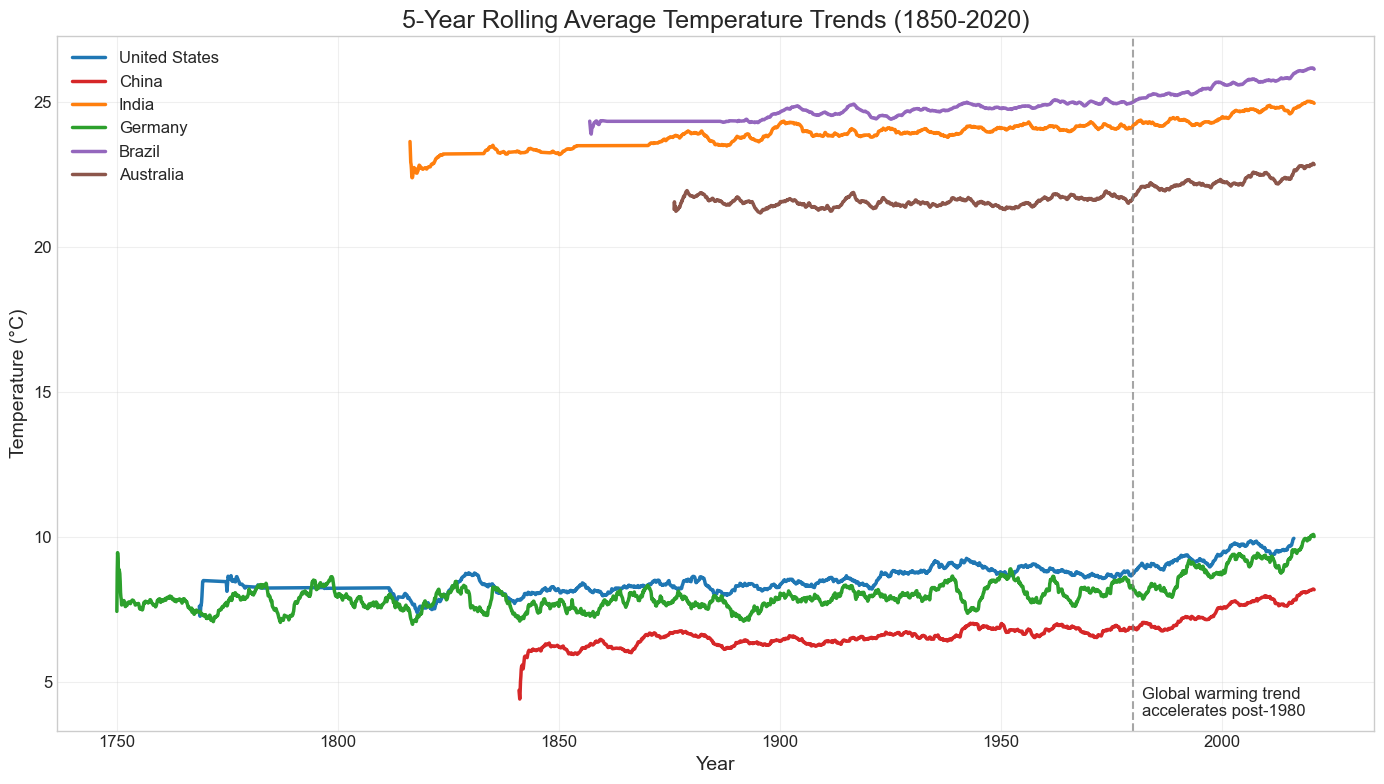

In [6]:
plt.figure(figsize=(14, 8))

# Create a 5-year rolling average for smoother trends
for country, df in dfs.items():
    # Create a copy to avoid SettingWithCopyWarning
    temp_df = df.copy()
    # Sort by year_decimal to ensure chronological order
    temp_df = temp_df.sort_values('year_decimal')
    # Calculate 5-year rolling average (60 months)
    temp_df['rolling_avg'] = temp_df['temperature_C'].rolling(window=60, min_periods=1).mean()
    
    # Plot the rolling average with distinct colors
    plt.plot(temp_df['year_decimal'], temp_df['rolling_avg'], 
             linewidth=2.5, 
             label=country.replace('-', ' ').title(),
             color=country_colors[country])

plt.title('5-Year Rolling Average Temperature Trends (1850-2020)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)

# Add annotation for climate change context
plt.axvline(x=1980, color='gray', linestyle='--', alpha=0.7)
plt.text(1982, plt.ylim()[0] + 0.5, 'Global warming trend\naccelerates post-1980', fontsize=12)

plt.tight_layout()
plt.savefig('temperature_trends_line.png', dpi=300)
plt.show()

## Visualisation 2: Recent Warming Rates

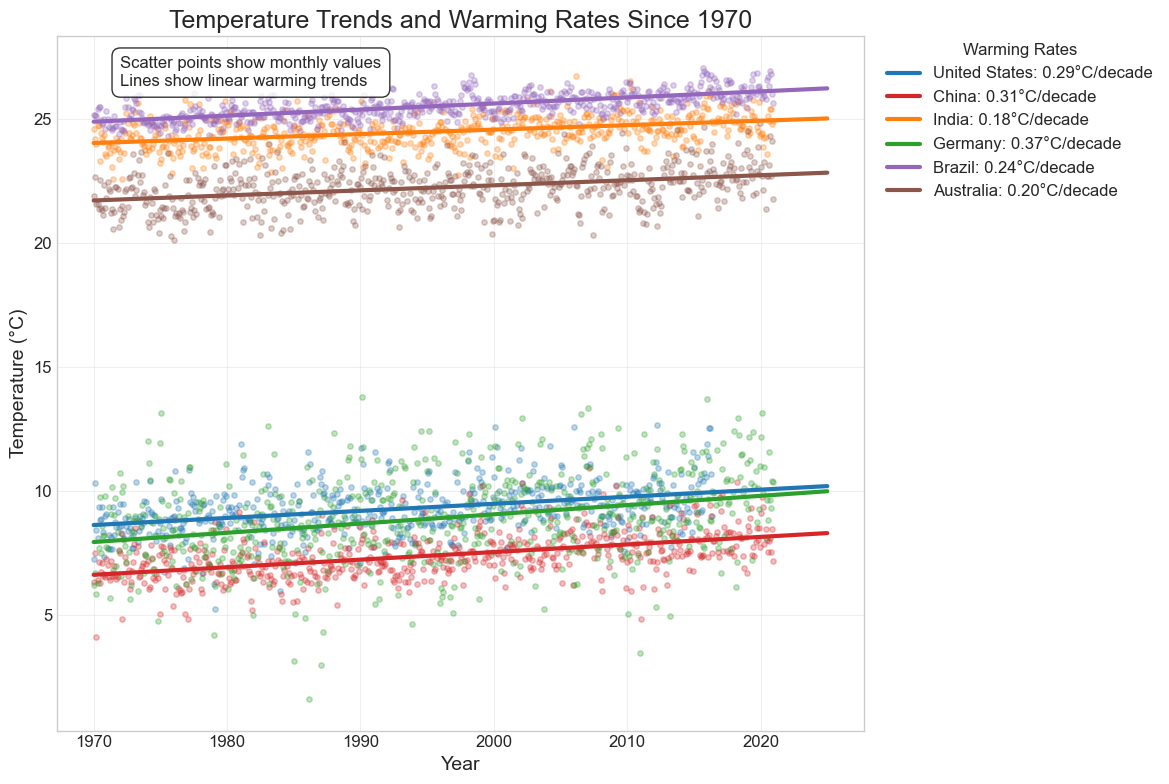

In [7]:
plt.figure(figsize=(14, 8))

# Define time periods for comparison
modern_period_start = 1970

# Plot data
for country, df in dfs.items():
    # Filter for modern period (1970 onwards)
    modern_df = df[df['year'] >= modern_period_start].copy()
    
    if not modern_df.empty:
        # Plot scatter points with transparency
        plt.scatter(modern_df['year_decimal'], modern_df['temperature_C'], 
                   alpha=0.3, s=15, color=country_colors[country], label=None)
        
        # Calculate and plot regression line
        if len(modern_df) > 1:  # Need at least 2 points for regression
            z = np.polyfit(modern_df['year_decimal'], modern_df['temperature_C'], 1)
            p = np.poly1d(z)
            
            # Calculate warming rate per decade
            warming_rate = z[0] * 10  # degrees per decade
            
            # Plot regression line
            x_line = np.linspace(modern_period_start, 2025, 100)
            plt.plot(x_line, p(x_line), linewidth=3, color=country_colors[country], 
                    label=f"{country.replace('-', ' ').title()}: {warming_rate:.2f}°C/decade")

plt.title('Temperature Trends and Warming Rates Since 1970', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)

# Move legend outside the plot area to the right
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12, 
           title="Warming Rates", borderaxespad=0)

# Add annotation with clearer positioning
plt.annotate('Scatter points show monthly values\nLines show linear warming trends', 
             xy=(1972, plt.gca().get_ylim()[1] - 2),
             fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))

plt.grid(True, alpha=0.3)
# Adjust layout to make room for the legend
plt.subplots_adjust(right=0.85)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect parameter to make room for legend

plt.savefig('new_warming_rates_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

## Visualisation 3: Temperature Distribution Shifts

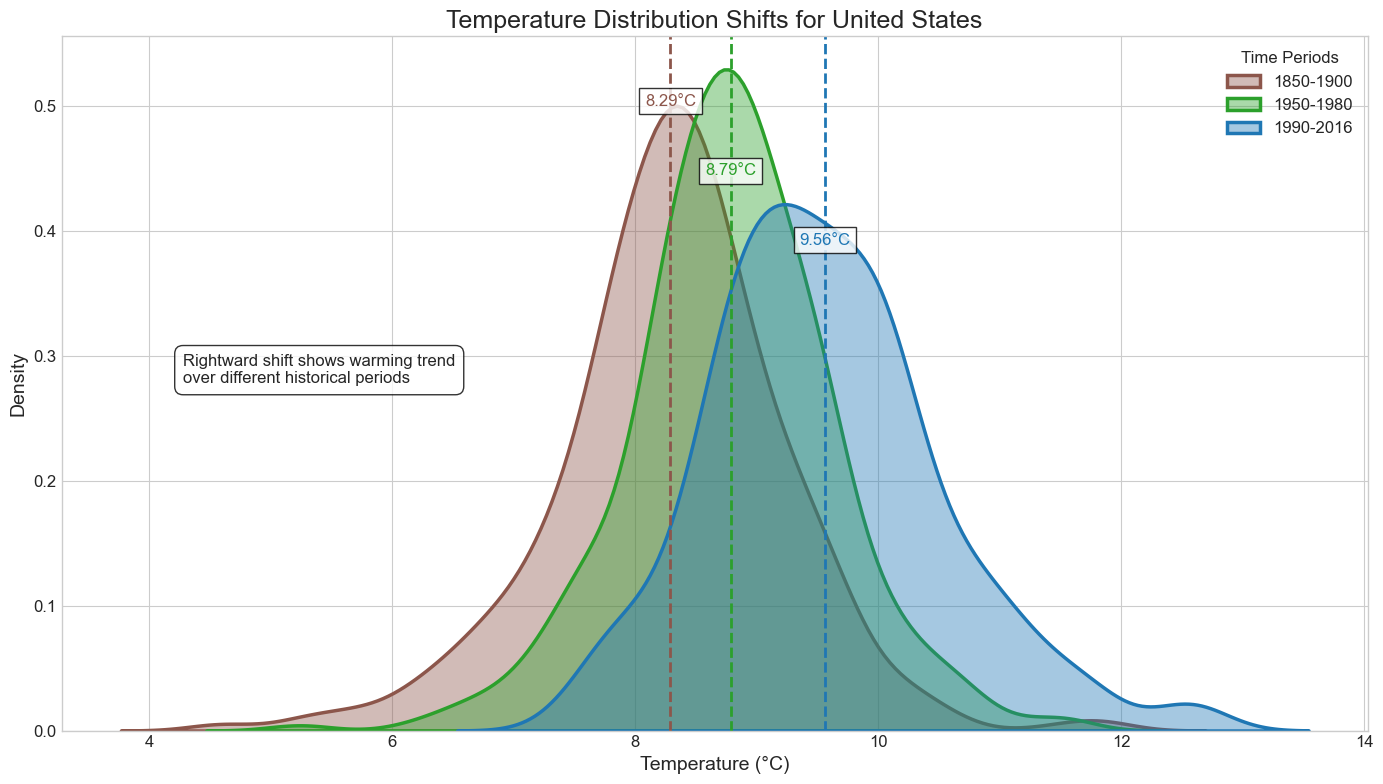

In [8]:
plt.figure(figsize=(14, 8))

# Select a representative country with long history
country = 'united-states'
if country in dfs:
    df = dfs[country]
    
    # Define time periods for comparison
    early_period = (1850, 1900)
    mid_period = (1950, 1980)
    recent_period = (1990, 2016)
    
    # Define distinct colors for periods
    period_colors = ['#8c564b', '#2ca02c', '#1f77b4']
    
    # Filter data for each period
    early_data = df[(df['year'] >= early_period[0]) & (df['year'] <= early_period[1])]['temperature_C']
    mid_data = df[(df['year'] >= mid_period[0]) & (df['year'] <= mid_period[1])]['temperature_C']
    recent_data = df[(df['year'] >= recent_period[0]) & (df['year'] <= recent_period[1])]['temperature_C']
    
    # Plot density curves with distinct colors
    sns.kdeplot(early_data, fill=True, alpha=0.4, linewidth=2.5, 
                label=f"{early_period[0]}-{early_period[1]}", color=period_colors[0])
    sns.kdeplot(mid_data, fill=True, alpha=0.4, linewidth=2.5, 
                label=f"{mid_period[0]}-{mid_period[1]}", color=period_colors[1])
    sns.kdeplot(recent_data, fill=True, alpha=0.4, linewidth=2.5, 
                label=f"{recent_period[0]}-{recent_period[1]}", color=period_colors[2])
    
    # Calculate and display mean temperatures for each period
    early_mean = early_data.mean()
    mid_mean = mid_data.mean()
    recent_mean = recent_data.mean()
    
    # Add vertical lines for means with matching colors
    plt.axvline(early_mean, color=period_colors[0], linestyle='--', linewidth=2)
    plt.axvline(mid_mean, color=period_colors[1], linestyle='--', linewidth=2)
    plt.axvline(recent_mean, color=period_colors[2], linestyle='--', linewidth=2)
    
    # Add annotations for mean values
    plt.text(early_mean, plt.gca().get_ylim()[1]*0.9, f"{early_mean:.2f}°C", 
             color=period_colors[0], ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    plt.text(mid_mean, plt.gca().get_ylim()[1]*0.8, f"{mid_mean:.2f}°C", 
             color=period_colors[1], ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    plt.text(recent_mean, plt.gca().get_ylim()[1]*0.7, f"{recent_mean:.2f}°C", 
             color=period_colors[2], ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.title(f'Temperature Distribution Shifts for {country.replace("-", " ").title()}', fontsize=18)
    plt.xlabel('Temperature (°C)', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend(fontsize=12, title="Time Periods")
    
    # Add annotation explaining the visualization
    plt.annotate('Rightward shift shows warming trend\nover different historical periods', 
                xy=(plt.gca().get_xlim()[0] + 1, plt.gca().get_ylim()[1]*0.5),
                fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('temperature_distribution_density.png', dpi=300)
    plt.show()

## Visualisation 4: Seasonal Temperature Patterns and Changes

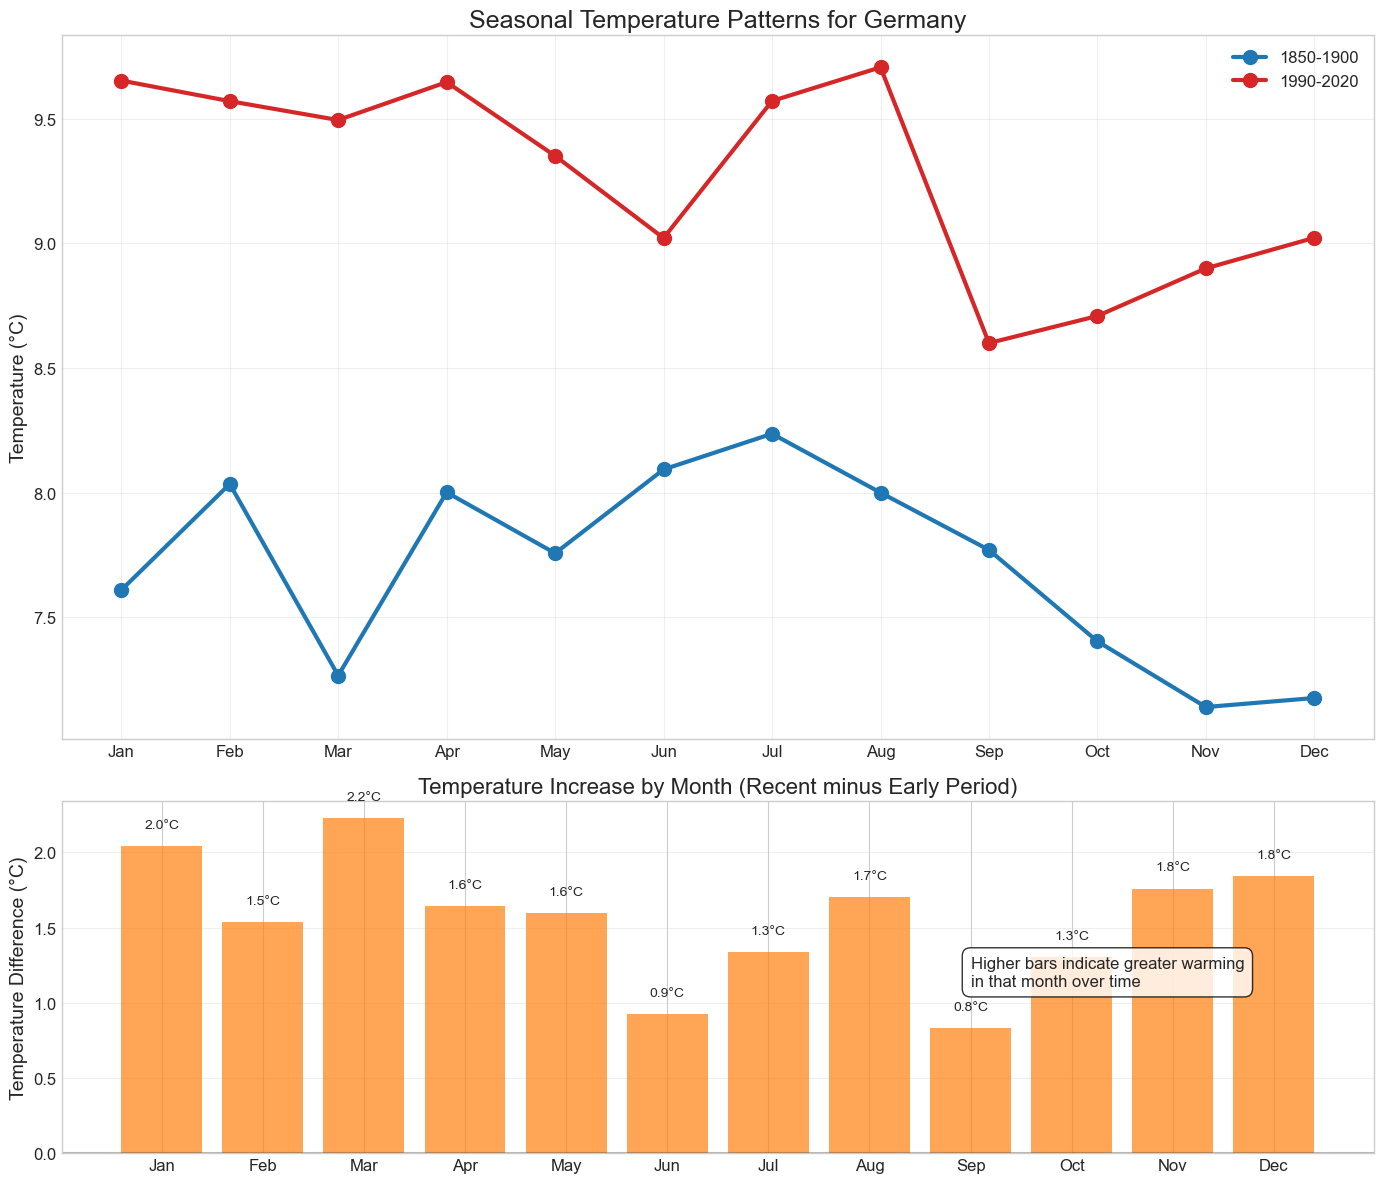

In [9]:
# Select a representative country
country = 'germany'
if country in dfs:
    df = dfs[country]
    
    # Define time periods for comparison
    early_period = (1850, 1900)
    recent_period = (1990, 2020)
    
    # Define distinct colors for periods
    early_color = '#1f77b4'  # blue
    recent_color = '#d62728'  # red
    
    # Create month names for x-axis
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # Calculate monthly averages for each period
    early_monthly = df[(df['year'] >= early_period[0]) & (df['year'] <= early_period[1])].groupby('month')['temperature_C'].mean()
    recent_monthly = df[(df['year'] >= recent_period[0]) & (df['year'] <= recent_period[1])].groupby('month')['temperature_C'].mean()
    
    # Calculate the difference between periods
    temp_diff = recent_monthly - early_monthly
    
    # Create a subplot with 2 rows
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1]})
    
    # Plot monthly averages on the first subplot with distinct colors
    ax1.plot(month_names, early_monthly.values, 'o-', linewidth=3, markersize=10, 
             label=f"{early_period[0]}-{early_period[1]}", color=early_color)
    ax1.plot(month_names, recent_monthly.values, 'o-', linewidth=3, markersize=10, 
             label=f"{recent_period[0]}-{recent_period[1]}", color=recent_color)
    
    ax1.set_title(f'Seasonal Temperature Patterns for {country.replace("-", " ").title()}', fontsize=18)
    ax1.set_ylabel('Temperature (°C)', fontsize=14)
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # Plot temperature differences on the second subplot
    bars = ax2.bar(month_names, temp_diff.values, color='#ff7f0e', alpha=0.7)  # orange
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:.1f}°C', ha='center', va='bottom', fontsize=10)
    
    ax2.set_title('Temperature Increase by Month (Recent minus Early Period)', fontsize=16)
    ax2.set_ylabel('Temperature Difference (°C)', fontsize=14)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Add a horizontal line at zero
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Add annotation explaining the visualization
    ax2.annotate('Higher bars indicate greater warming\nin that month over time', 
                xy=(8, max(temp_diff.values)*0.5),
                fontsize=12, bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('seasonal_temperature_changes.png', dpi=300)
    plt.show()

## Table 1: Summary Statistics

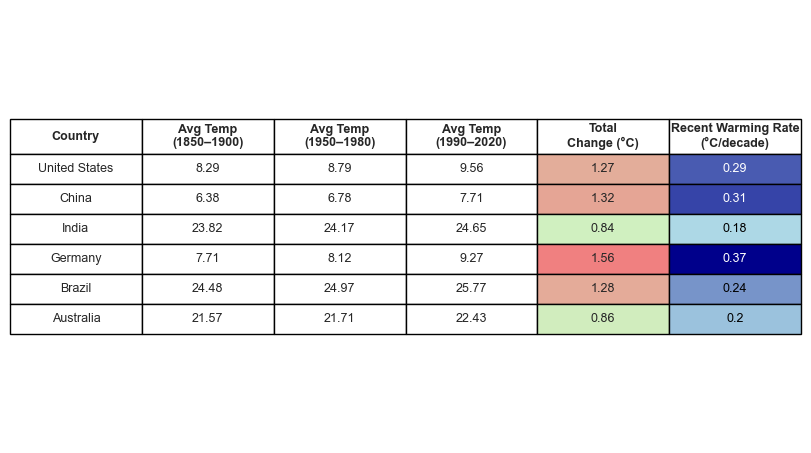

In [11]:
# Generate summary statistics table
summary_stats = []

for country, df in dfs.items():
    # Calculate statistics for different time periods
    early = df[(df['year'] >= 1850) & (df['year'] <= 1900)]['temperature_C'].mean() if len(df[(df['year'] >= 1850) & (df['year'] <= 1900)]) > 0 else np.nan
    mid = df[(df['year'] >= 1950) & (df['year'] <= 1980)]['temperature_C'].mean() if len(df[(df['year'] >= 1950) & (df['year'] <= 1980)]) > 0 else np.nan
    recent = df[(df['year'] >= 1990)]['temperature_C'].mean() if len(df[(df['year'] >= 1990)]) > 0 else np.nan
    
    # Calculate total change if both periods have data
    total_change = recent - early if not np.isnan(early) and not np.isnan(recent) else np.nan
    
    # Calculate warming rate for recent period (1970 onwards)
    modern_df = df[df['year'] >= 1970].copy()
    warming_rate = np.nan
    
    if len(modern_df) > 1:  # Need at least 2 points for regression
        z = np.polyfit(modern_df['year_decimal'], modern_df['temperature_C'], 1)
        warming_rate = z[0] * 10  # degrees per decade
    
    # Add to summary statistics
    summary_stats.append({
        'Country': country.replace('-', ' ').title(),
        '1850-1900 Avg': early,
        '1950-1980 Avg': mid,
        '1990-2020 Avg': recent,
        'Total Change': total_change,
        'Recent Warming Rate (°C/decade)': warming_rate
    })

# Create a DataFrame from the summary statistics
summary_df = pd.DataFrame(summary_stats)

# Round the data for cleaner table visuals
rounded_df = summary_df.round(2)

# Define color maps for the columns to be highlighted
cmap_change = LinearSegmentedColormap.from_list('change', ['#d0f0c0', '#f08080'])  # green to red
cmap_rate = LinearSegmentedColormap.from_list('rate', ['#add8e6', '#00008b'])      # light blue to dark blue

# Normalize color ranges for the two key columns
total_change_norm = plt.Normalize(rounded_df['Total Change'].min(), rounded_df['Total Change'].max())
warming_rate_norm = plt.Normalize(rounded_df['Recent Warming Rate (°C/decade)'].min(), rounded_df['Recent Warming Rate (°C/decade)'].max())

# Create a figure sized for A4 
fig, ax = plt.subplots(figsize=(8.27, 4.69))
ax.axis('off')

# Replace the column labels with line-break versions for better fit
col_labels = [
    "Country",
    "Avg Temp\n(1850–1900)",
    "Avg Temp\n(1950–1980)",
    "Avg Temp\n(1990–2020)",
    "Total\nChange (°C)",
    "Recent Warming Rate\n(°C/decade)"
]

# Create the table with formatted column labels
table = ax.table(
    cellText=rounded_df.values,
    colLabels=col_labels,
    cellLoc='center',
    loc='center'
)

# Font and scale
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)

# Adjust header formatting (row 0)
for col_idx in range(len(col_labels)):
    cell = table[(0, col_idx)]
    cell.set_text_props(weight='bold', ha='center', va='center')
    cell.set_height(0.08)  # Increase header height slightly for wrapped text

def is_dark_color(rgb):
    # Calculate luminance using perceived brightness formula
    r, g, b = rgb[:3]
    luminance = 0.299 * r + 0.587 * g + 0.114 * b
    return luminance < 0.5  # True if it's a dark color

for i in range(len(rounded_df)):
    change_color = cmap_change(total_change_norm(rounded_df.iloc[i]['Total Change']))
    rate_color = cmap_rate(warming_rate_norm(rounded_df.iloc[i]['Recent Warming Rate (°C/decade)']))

    # Set background colors
    table[(i+1, 4)].set_facecolor(change_color)
    table[(i+1, 5)].set_facecolor(rate_color)

    # Set text color based on background brightness
    if is_dark_color(rate_color):
        table[(i+1, 5)].get_text().set_color('white')
    else:
        table[(i+1, 5)].get_text().set_color('black')


# Adjust layout and save as PNG
plt.tight_layout()
plt.savefig("temperature_summary_statistics.png", dpi=300)
plt.show()